In [2]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, fbeta_score, log_loss, matthews_corrcoef
from sklearn.metrics import average_precision_score, precision_recall_curve, auc
import pickle
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier

In [3]:
final_df=pd.read_csv('Final_Encoded.csv')

CLASS IMBALANCE

In [4]:
# Assuming final_df is your DataFrame and 'flagged' is the column with class labels
class_distribution = final_df['flagged'].value_counts()

# Calculate the percentage of each class
class_percentage = final_df['flagged'].value_counts(normalize=True) * 100

# Display the count and percentage of each class
print("Class Distribution Count:\n", class_distribution)
print("\nClass Distribution Percentage:\n", class_percentage)

Class Distribution Count:
 0    350352
1    135179
Name: flagged, dtype: int64

Class Distribution Percentage:
 0    72.158523
1    27.841477
Name: flagged, dtype: float64


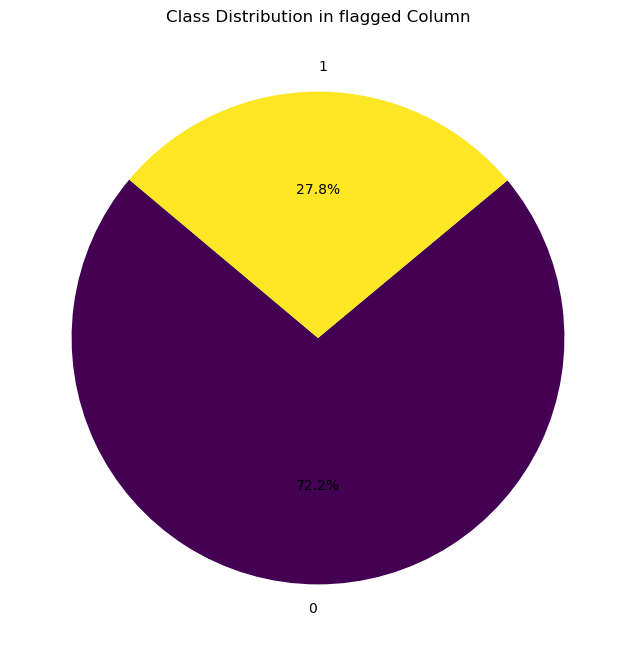

In [5]:
# Assuming final_df is your DataFrame and 'flagged' is the column with class labels
class_distribution = final_df['flagged'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(class_distribution, labels=class_distribution.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.viridis(np.linspace(0, 1, len(class_distribution))))
plt.title('Class Distribution in flagged Column')
plt.show()

#### LIGHT GBM

In [8]:
# Assuming final_df is your DataFrame and 'flagged' is the column with class labels
selected_columns = ['ip_number', 'wallet_number_to', 'region', 'Adjusted Account Age','browser_environment', 'wallet_number_from', 'business_type_class',
'city', 'trx_type', 'country','amount']
X = final_df[selected_columns]
y = final_df['flagged']

In [9]:
# Split the dataset into training and test sets
y = final_df['flagged']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
# Define the model to tune
model = lgb.LGBMClassifier(is_unbalance=True)

# Create the parameter grid
param_grid = {
    'num_leaves': [31, 60, 100],
    'max_depth': [-1, 10, 20],
    'learning_rate': [0.1, 0.01, 0.001]
}

# Setup the grid search
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='roc_auc', verbose=2)

# Fit grid search
best_model = grid_search.fit(X_train, y_train)

# Print best parameters
print("Best parameters found: ", grid_search.best_params_)

Fitting 3 folds for each of 27 candidates, totalling 81 fits
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 72095, number of negative: 186854
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002743 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2011
[LightGBM] [Info] Number of data points in the train set: 258949, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.278414 -> initscore=-0.952343
[LightGBM] [Info] Start training from score -0.952343
[CV] END .....learning_rate=0.1, max_depth=-1, num_leaves=31; total time=   0.6s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 72095, number of negative: 186854
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the over

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 72096, number of negative: 186854
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003948 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2010
[LightGBM] [Info] Number of data points in the train set: 258950, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.278417 -> initscore=-0.952329
[LightGBM] [Info] Start training from score -0.952329
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[CV] END .....learning_rate=0.1, max_depth=10, num_leaves=31; total time=   0.4s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[Li

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 72095, number of negative: 186854
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004257 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2007
[LightGBM] [Info] Number of data points in the train set: 258949, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.278414 -> initscore=-0.952343
[LightGBM] [Info] Start training from score -0.952343
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[CV] END .....learning_rate=0.1, max_depth=20, num_leaves=31; total time=   0.4s
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves

[CV] END ....learning_rate=0.01, max_depth=-1, num_leaves=60; total time=   0.5s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 72095, number of negative: 186854
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004285 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2007
[LightGBM] [Info] Number of data points in the train set: 258949, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.278414 -> initscore=-0.952343
[LightGBM] [Info] Start training from score -0.952343
[CV] END ....learning_rate=0.01, max_depth=-1, num_leaves=60; total time=   0.5s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 72096, number of negative: 186854
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001973 seconds.
You ca

[CV] END ....learning_rate=0.01, max_depth=10, num_leaves=60; total time=   0.5s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 72095, number of negative: 186854
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004242 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2011
[LightGBM] [Info] Number of data points in the train set: 258949, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.278414 -> initscore=-0.952343
[LightGBM] [Info] Start training from score -0.952343
[CV] END ...learning_rate=0.01, max_depth=10, num_leaves=100; total time=   0.5s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 72095, number of negative: 186854
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003828 seconds.
You ca

[CV] END ...learning_rate=0.01, max_depth=20, num_leaves=100; total time=   0.6s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 72096, number of negative: 186854
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002697 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2010
[LightGBM] [Info] Number of data points in the train set: 258950, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.278417 -> initscore=-0.952329
[LightGBM] [Info] Start training from score -0.952329
[CV] END ...learning_rate=0.01, max_depth=20, num_leaves=100; total time=   0.6s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 72095, number of negative: 186854
[LightGBM] [Info] Auto-choosing col-wise multi

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[CV] END ...learning_rate=0.001, max_depth=10, num_leaves=31; total time=   0.4s
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 72096, number of negative: 186854
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001906 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2010
[LightGBM] [Info] Number of data points in the train set: 258950, number of used features: 11
[LightGBM] [Info] [bina

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[CV] END ...learning_rate=0.001, max_depth=20, num_leaves=31; total time=   0.5s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 72095, number of negative: 186854
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002003 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2011
[LightGBM] [Info] Number of data points in the train set: 258949, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.278414 -> initscore=-0.952343
[LightGBM] [Info] Start training from score -0.952343
[CV] END ...learning_rate=0.001, max_depth=20, num_leaves=60; total time=   0.5s
[LightGBM] [Warning] Found whitespace in feature_names, replace with

In [10]:
# Assuming final_df is your DataFrame and 'flagged' is the column with class labels
X = final_df[selected_columns]
y = final_df['flagged']

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Set LightGBM parameters
params = {
    'boosting_type': 'gbdt',
    'objective': 'binary',
    'metric': 'binary_logloss',
    'is_unbalance': True,
    'learning_rate': 0.01,
    'num_leaves': 31,
    'max_depth': 10,
    'n_estimators': 100,
    'max_bin': 255
}

# Create the LightGBM data containers
train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_test, label=y_test)

# Train the model with the correct verbose_eval parameter
model = lgb.train(
    params,
    train_data,
    num_boost_round=100,
    valid_sets=[train_data, test_data]
    #verbose_eval=10  # Output the metric result every 10 iterations
)

# Make predictions on the test set
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob >= 0.5).astype(int)  # Convert probabilities to binary output

# Evaluate the model
report = classification_report(y_test, y_pred)
print(report)

C:\Users\jithi\anaconda3\Lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 108143, number of negative: 280281
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003089 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2009
[LightGBM] [Info] Number of data points in the train set: 388424, number of used features: 11
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] [bina

In [11]:
# ACCURACY
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# AUC
auc_score = roc_auc_score(y_test, y_pred_prob)
print("AUC:", auc_score)

# AUCPR
precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)
aucpr = auc(recall, precision)
print("AUCPR:", aucpr)

# F0.5 Score
f05_score = fbeta_score(y_test, y_pred, beta=0.5)
print("F0.5 Score:", f05_score)

# F1 Score
f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)

# F2 Score
f2_score = fbeta_score(y_test, y_pred, beta=2)
print("F2 Score:", f2_score)

# GINI
gini_score = 2 * roc_auc_score(y_test, y_pred_prob) - 1
print("GINI:", gini_score)

# LOGLOSS
logloss = log_loss(y_test, y_pred_prob)
print("Log Loss:", logloss)

# MACROAUC (same as AUC if binary classification, different handling if multiclass)
macro_auc = roc_auc_score(y_test, y_pred_prob, average='macro')
print("MACROAUC:", macro_auc)

# MCC
mcc = matthews_corrcoef(y_test, y_pred)
print("MCC:", mcc)

Accuracy: 0.8699784773497277
AUC: 0.9520106839977744
AUCPR: 0.8957138449043459
F0.5 Score: 0.7571069425643009
F1 Score: 0.7764280908028474
F2 Score: 0.7967612042272972
GINI: 0.9040213679955489
Log Loss: 0.3230838439726505
MACROAUC: 0.9520106839977744
MCC: 0.6862295970896841


In [12]:

# Save the model to a file
model_filename = 'lgb_model.pkl'
with open(model_filename, 'wb') as file:
    pickle.dump(model, file)

print(f'Model saved to {model_filename}')

Model saved to lgb_model.pkl
